In [14]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from function.valuate import *
from function.normalize import *
from function.crossover import *
from function.visualize import *

In [15]:
def normalize_theta(theta):
    return theta / np.sum(theta)

In [16]:
list_high_fitness = []
def fitness(theta):
    normalized_theta = normalize_theta(theta)
    accuracy = valuate_f1_score(normalized_theta)
    return accuracy.mean()**2
    

In [17]:
def generate_initial_solutions(num_solutions, num_params):
    solutions = []
    for _ in range(num_solutions):
        solution = np.random.rand(num_params)
        solutions.append(tuple(solution))
    return solutions


def mutate(child, mutation_rate):  # Ham dot bien
    mutated_child = tuple([gene * random.uniform(1 - mutation_rate, 1 + mutation_rate) for gene in child])
    return mutated_child

In [18]:
# Số lượng tham số
num_params = 16

# Số lượng giải pháp và thế hệ
num_solutions = 100
num_generations = 100

# Tạo thế hệ ban đầu
solutions = generate_initial_solutions(num_solutions, num_params)
# solutions.append(tuple([0.26634927, 0.28612145, 0.00052237, 0.00077817, 0.00050339,
#        0.00060969, 0.00078907, 0.01359848, 0.00477584, 0.19286061,
#        0.16660618, 0.00207712, 0.00063955, 0.00597616, 0.0102838 ,
#        0.04750882]))



In [19]:
for generation_id in range(num_generations):
    # print(generation_id)
    rankedsolutions = [(fitness(s), s) for s in solutions]
    rankedsolutions = sorted(rankedsolutions, key=lambda x: x[0], reverse=True)

    list_high_fitness.append(rankedsolutions[0][0])
    if rankedsolutions[0][0] >=0.8:
        break

    bestSolutions = rankedsolutions[:10] + rankedsolutions[-1:]

    elements = np.concatenate([np.array(s[1]) for s in bestSolutions])
    newGen = []

    for _ in range(len(solutions)):
        # Crossover
        parent1, parent2 = random.choice(bestSolutions)[1], random.choice(bestSolutions)[1]
        child = two_point_crossover(parent1, parent2)

        # Mutation
        mutated_child = mutate(child, mutation_rate=0.01)

        # Chuẩn hóa tổng của mutated_child để bằng 1
        normalized_mutated_child = normalize_theta(mutated_child)

        newGen.append(normalized_mutated_child)

    solutions = newGen

In [ ]:
theta=np.array(solutions[0])
y_pre, y_true = get_yp_yt(theta)
final_accuracy, confuse = accuracy_all(theta)

In [ ]:
np.array(confuse).mean()

IndexError: list index out of range

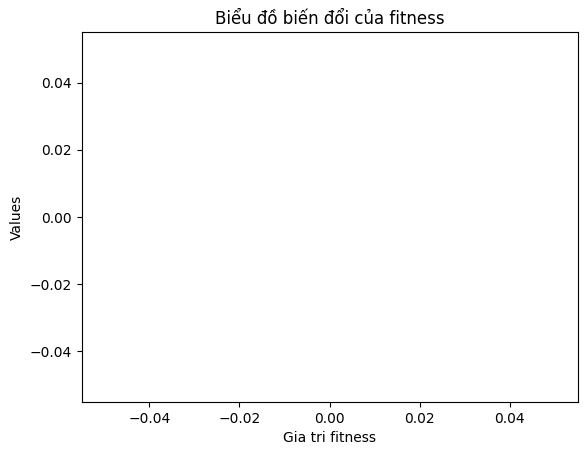

In [ ]:
change_value(list_high_fitness)

/home/hoan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


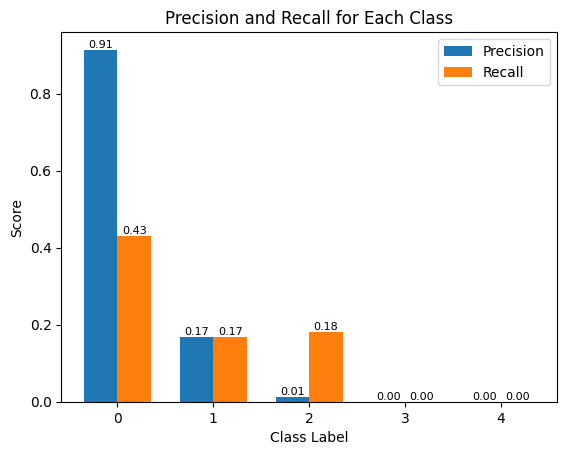

In [ ]:
visualize_precision(y_pre, y_true)

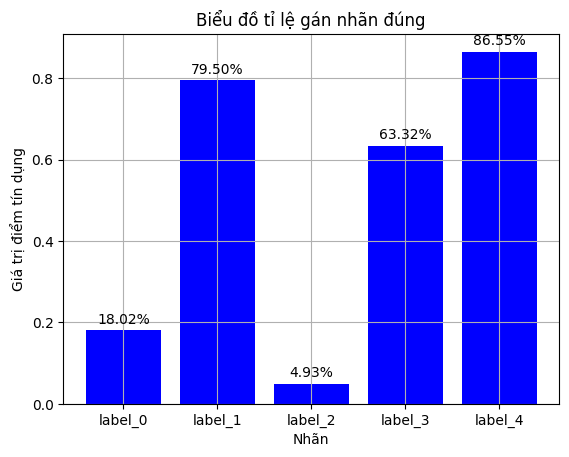

In [ ]:
ratio_chart_true_label(final_accuracy)

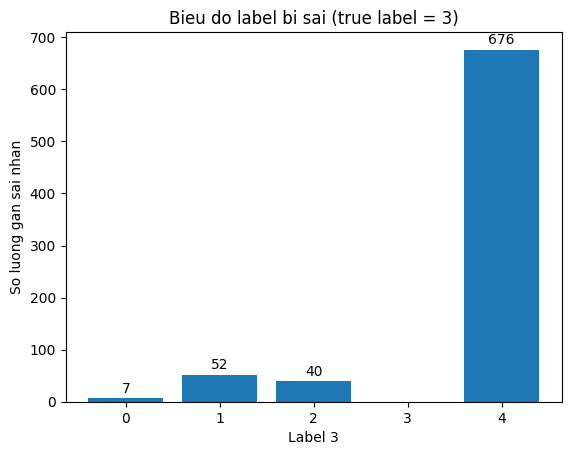

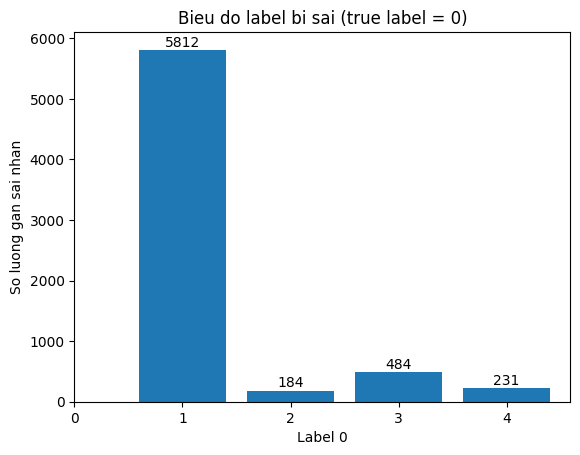

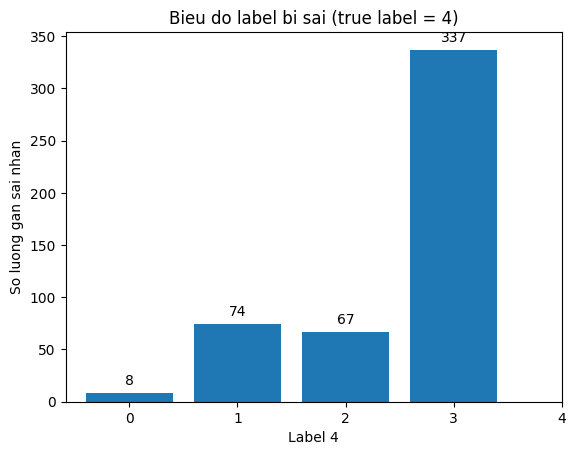

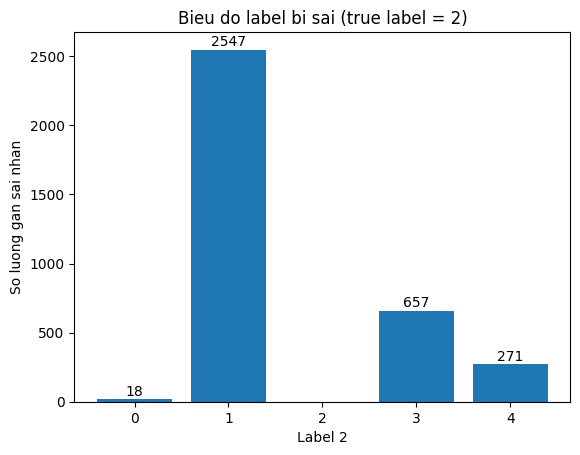

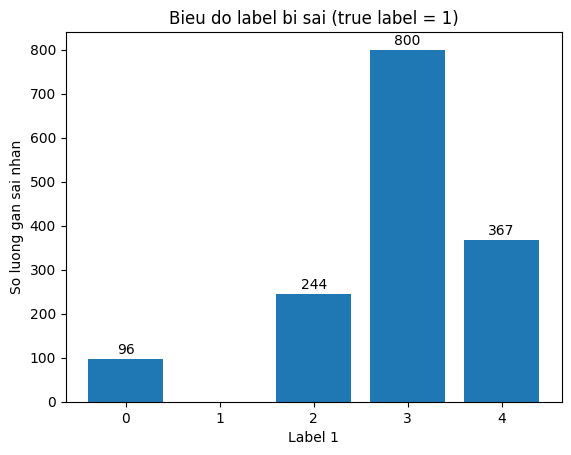

In [ ]:
confuse_chart(confuse)